# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

261

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities


['qaanaaq',
 'illoqqortoormiut',
 'port alfred',
 'hermanus',
 'matagami',
 'avarua',
 'kapaa',
 'saint-philippe',
 'codrington',
 'umzimvubu',
 'port lincoln',
 'upernavik',
 'bambous virieux',
 'dubbo',
 'chongqing',
 'taolanaro',
 'busselton',
 'cape town',
 'tyup',
 'albany',
 'barentsburg',
 'isla vista',
 'lebu',
 'ngukurr',
 'punta arenas',
 'atuona',
 'barrington',
 'rikitea',
 'nikolskoye',
 'jamestown',
 'puerto ayora',
 'waingapu',
 'leh',
 'mataura',
 'tasiilaq',
 'bluff',
 'labuhan',
 'kulhudhuffushi',
 'attawapiskat',
 'mragowo',
 'inhambane',
 'coihaique',
 'ushuaia',
 'ribeira grande',
 'ambon',
 'port elizabeth',
 'butaritari',
 'georgetown',
 'batagay',
 'binzhou',
 'sambava',
 'sidi ali',
 'beringovskiy',
 'mount gambier',
 'victoria',
 'san patricio',
 'kaeo',
 'nikolsk',
 'hobart',
 'barrow',
 'de-kastri',
 'chapais',
 'bud',
 'east london',
 'zemio',
 'naze',
 'launceston',
 'riberalta',
 'alice springs',
 'arraial do cabo',
 'hasaki',
 'lundazi',
 'faanui',
 'cho

In [16]:
#URL for Open Weather Map api
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

#Create variables and empty lists to append the data 
city_name = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

#Create counter for loop 
count = 1

#Loop through the cities in the city list 
for city in cities:  
    
    #Try statement to append calls where value is found 
    #Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        
        #Include a print log of each city as processed
        record = response["name"]
        print(f"Processing Record {count}: {record}")
        print(f"{url}&q={city}")
        
        #Increase counter by one 
        count= count + 1
        
    #If no record found skip and display message
    except:
        print("No Bueno, try again")
    continue

Processing Record 1: Qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=qaanaaq
No Bueno, try again
Processing Record 2: Port Alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=port alfred
Processing Record 3: Hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=hermanus
Processing Record 4: Matagami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=matagami
Processing Record 5: Avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=avarua
Processing Record 6: Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=kapaa
Processing Record 7: Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e711409

Processing Record 58: East London
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=east london
Processing Record 59: Zemio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=zemio
Processing Record 60: Naze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=naze
Processing Record 61: Launceston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=launceston
Processing Record 62: Riberalta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=riberalta
Processing Record 63: Alice Springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=alice springs
Processing Record 64: Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114

Processing Record 114: Laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=laguna
Processing Record 115: Kampot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=kampot
Processing Record 116: Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=touros
Processing Record 117: Putina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=putina
Processing Record 118: Kenora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=kenora
No Bueno, try again
Processing Record 119: Khartoum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=khartoum
Processing Record 120: Castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=cas

Processing Record 170: Karagay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=karagay
Processing Record 171: Tiarei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=tiarei
Processing Record 172: Provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=provideniya
No Bueno, try again
Processing Record 173: Adwa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=adwa
Processing Record 174: Argir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=argir
Processing Record 175: Seydi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=seydi
Processing Record 176: Muddebihal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q

Processing Record 226: Kosa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=kosa
Processing Record 227: Atakpame
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=atakpame
Processing Record 228: Kavaratti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=kavaratti
Processing Record 229: Narasannapeta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=narasannapeta
Processing Record 230: Lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=lasa
Processing Record 231: Eagle Pass
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=eagle pass
Processing Record 232: Lumphat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6ff789f12e6e02433edfdf6e7114093d&q=lu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
#Create a dataframe of City Data
cities_df = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Temp": temp,
    "Humidity": humidity,
    "Cloudiness":cloudiness, 
    "Wind Speed":wind_speed   
}
weather_data = pd.DataFrame(cities_df)

#Check Data
weather_data.count()

City          233
Lat           233
Lng           233
Temp          233
Humidity      233
Cloudiness    233
Wind Speed    233
dtype: int64

In [11]:
#Export city data into a .csv
weather_data.to_csv("output_data/cities.csv")

#Display
weather_data.head()

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,77.48,-69.36,35.69,76,100,5.82
1,Port Alfred,-33.59,26.89,64.99,80,20,4.00
2,Hermanus,-34.42,19.24,54.00,99,100,3.00
3,Matagami,9.67,8.40,66.65,97,100,0.34
4,Avarua,-21.21,-159.78,77.00,83,98,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

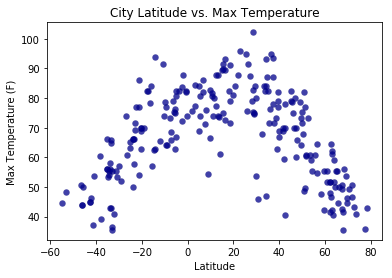

In [12]:
#Create scatter plot
plt.scatter(weather_data["Lat"], weather_data["Temp"], marker="o", s=40, c="darkblue", alpha=0.75, edgecolor="black", linewidth=0.05)

#Add Labels
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

#Save plotted figures
plt.savefig("output_data/lat_vs_temp.png")

#Show plot
plt.show()

#### Latitude vs. Humidity Plot

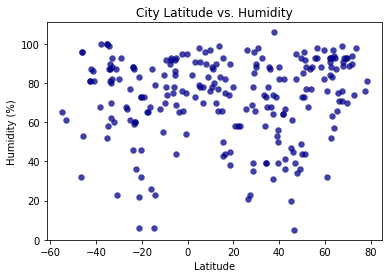

In [13]:
#Create scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=40, c="darkblue", alpha=0.75, edgecolor="black", linewidth=0.05)

#Add Labels
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

#Save plotted figures
plt.savefig("output_data/lat_vs_humidity.png")

#Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

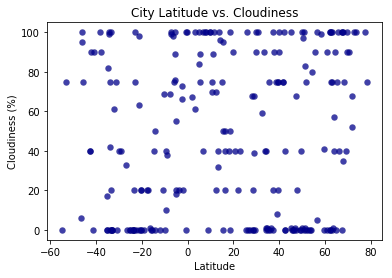

In [14]:
#Create scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=40, c="darkblue", alpha=0.75, edgecolor="black", linewidth=0.05)

#Add Labels
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

#Save plotted figures
plt.savefig("output_data/lat_vs_cloudiness.png")

#Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

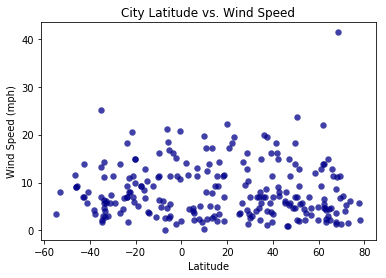

In [15]:
#Create scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=40, c="darkblue", alpha=0.75, edgecolor="black", linewidth=0.05)

#Add Labels
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

#Save plotted figures
plt.savefig("output_data/lat_vs_wind_speed.png")

#Show plot
plt.show()

Obsservable Trends

1. Location doesn't really show any effect on windspeed.
2. Temp has an obvious increase towards 0 latiitude.
3. Humidity average seems to be between 60 and 90 worldwide.